In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import iqr

Questa esercitazione si articola in tre parti.

1. Nella prima, leggiamo il file CSV rappresentativo dei passeggeri del dataset Titanic mediante Pandas, e salviamo i suoi contenuti all'interno di un oggetto di classe `DataFrame`.
2. Nella seconda, individuiamo le feature caratterizzate da un valore *univoco* per ciascun dato (come, ad esempio, il nome del passeggero).
3. Nella terza ed ultima, mostriamo a schermo istogramma, mediana, deviazione standard e range interquartile per ciascuna delle feature numeriche presenti nel dataframe.

# Lettura dei dati

Salviamo i dati in un dataframe mediante la funzione `read_csv`, e mostriamo le prime cinque righe.

In [17]:
df = pd.read_csv('../dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Notiamo che la colonna `PassengerId` può essere usata come indice. Usiamo in tal senso la funzione [`set_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html).

In [18]:
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
feature = list(df.columns)
feature_i_ma = df[df.columns[2]]
len(set(feature_i_ma)) == len(feature_i_ma)

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

# Individuazione delle feature univoche

Creiamo la funzione `get_all_unique(df)` che, dato in ingresso il dataframe `df`, restituisce tutte le feature che assumono un valore univoco per ogni campione (ad esempio, il nome del passeggero).

In [4]:
def get_all_unique(df):
    return [True if len(set(df[col])) == len(df[col]) else False for col in df.columns]

uniques = get_all_unique(df)
print(uniques)

[False, False, True, False, False, False, False, False, False, False, False]


# Statistiche per le feature numeriche

Scriviamo adesso una serie di istruzioni (**non** una funzione) per individuare tutte le feature numeriche presenti nel dataframe. Per ciascuna di queste, mostriamo a schermo l'istogramma, e calcoliamo mediana, deviazione standard e range interquartile. Per quest'ultimo, usiamo la funzione [`iqr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html) di `scipy.stats`. 

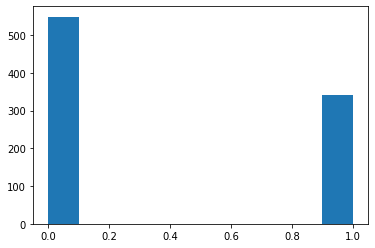

Feature: Survived - Mediana: 0.0 - Deviazione standard: 0.49 - Range interquartile: 1.0


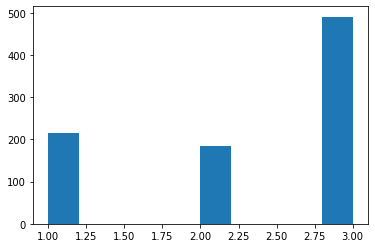

Feature: Pclass - Mediana: 3.0 - Deviazione standard: 0.84 - Range interquartile: 1.0


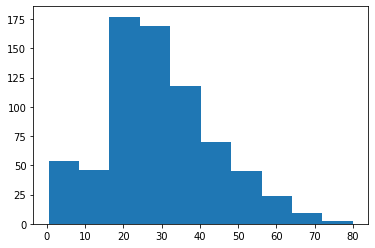

Feature: Age - Mediana: nan - Deviazione standard: 14.52 - Range interquartile: nan


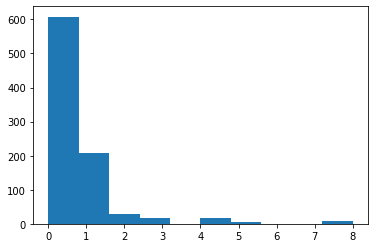

Feature: SibSp - Mediana: 0.0 - Deviazione standard: 1.1 - Range interquartile: 1.0


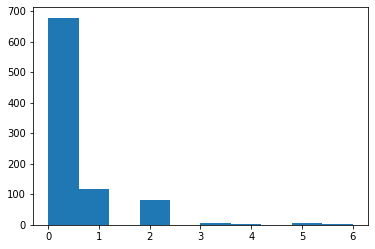

Feature: Parch - Mediana: 0.0 - Deviazione standard: 0.81 - Range interquartile: 0.0


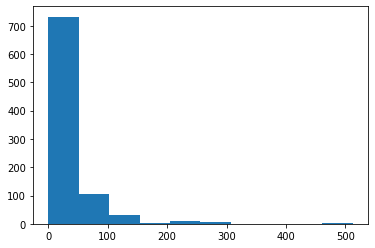

Feature: Fare - Mediana: 14.45 - Deviazione standard: 49.67 - Range interquartile: 23.09


In [35]:
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        col = df.columns[i]
        plt.hist(df[col])
        plt.show()
        print('Feature: {} - Mediana: {} - Deviazione standard: {} - Range interquartile: {}'
              .format(
                  col,
                  round(np.median(df[col]), 2),
                  round(np.std(df[col]), 2),
                  round(iqr(df[col]), 2)))